# Иерархическая кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

In [2]:
# импортируем набор данных
df = pd.read_csv('housing.csv')
df = df.dropna()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['ocean_proximity'])
df['ocean_proximity'] = label_encoder.transform(df['ocean_proximity'])

In [3]:
X = df.iloc[:, [3, 4, 5, 7]].values
X

array([[8.8000e+02, 1.2900e+02, 3.2200e+02, 8.3252e+00],
       [7.0990e+03, 1.1060e+03, 2.4010e+03, 8.3014e+00],
       [1.4670e+03, 1.9000e+02, 4.9600e+02, 7.2574e+00],
       ...,
       [2.2540e+03, 4.8500e+02, 1.0070e+03, 1.7000e+00],
       [1.8600e+03, 4.0900e+02, 7.4100e+02, 1.8672e+00],
       [2.7850e+03, 6.1600e+02, 1.3870e+03, 2.3886e+00]])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.6 MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [6]:
df.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [7]:
df.ocean_proximity.value_counts()

ocean_proximity
0    9034
1    6496
4    2628
3    2270
2       5
Name: count, dtype: int64

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# correl=df.corr()
# sns.heatmap(correl,annot=True)

In [10]:
# x_axis = df.SepalLengthCm.values 
# y_axis = df.SepalWidthCm.values 

# plt.xlabel(df.columns.values[1])
# plt.ylabel(df.columns.values[2])
# plt.scatter(x_axis, y_axis)
# plt.show()

In [11]:
# import seaborn as sns

# sns.set_style("whitegrid")
# sns.pairplot(df,hue="Species",size=3);
# plt.show()

In [12]:
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()

# plt.show()

In [13]:
# sns.boxplot(x="Species",y="PetalLengthCm",data=df)
# plt.show()

# метод локтя

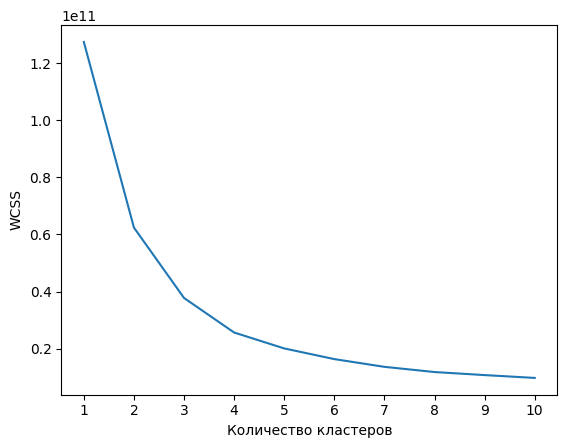

In [14]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

# кросс-валидация

In [15]:
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

In [16]:
import numpy as np
from sklearn.model_selection import KFold

<AxesSubplot: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

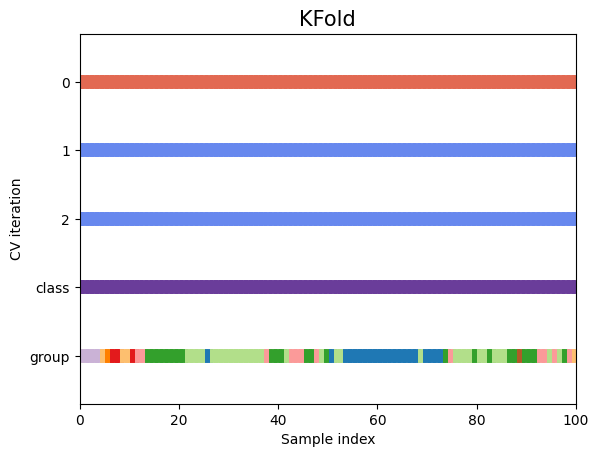

In [17]:
n_splits = 3
y = df.ocean_proximity 
groups = df.median_house_value
fig, ax = plt.subplots()
cv = KFold(n_splits)

plot_cv_indices(cv, X, y, groups, ax, n_splits)

# силуэтный коэффициент

In [18]:
from itertools import combinations

In [19]:
X = df.iloc[:, [3, 4, 5, 7]].values
xdf = pd.DataFrame(X)


In [20]:
lst_vars=list(combinations(xdf.columns, 2))

In [21]:
# количество пар
len(lst_vars)

6

In [22]:
lst_vars

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

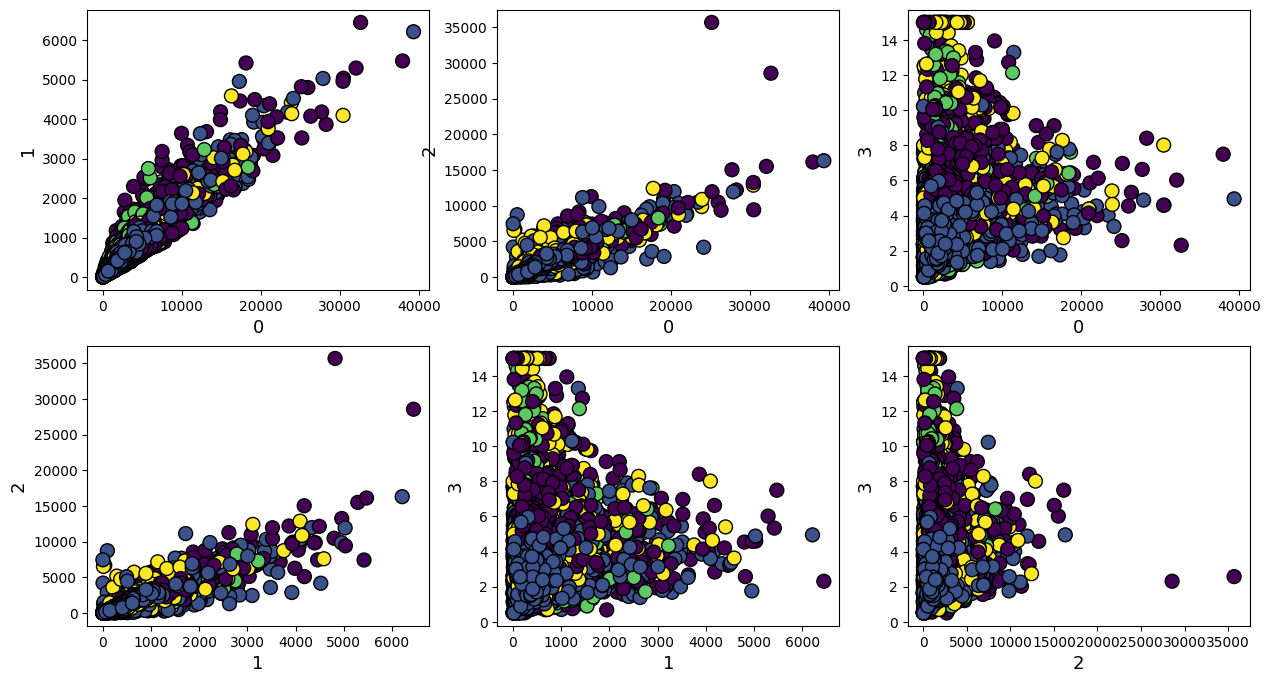

In [23]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(xdf[dim1],xdf[dim2],c=df['ocean_proximity'],edgecolor='k',s=100)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

# визуализация матрицы схожести

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

X = df.iloc[:, [3, 4, 5, 7]].values
xdf = pd.DataFrame(X)

vectorizer = CountVectorizer()
#vectors = vectorizer.fit_transform(xdf.to_string())
similarity_matrix = cosine_similarity(xdf)

In [6]:
similarity_matrix

array([[1.        , 0.99962564, 0.99958219, ..., 0.99599395, 0.99748687,
        0.99223625],
       [0.99962564, 1.        , 0.99969495, ..., 0.99458664, 0.99712919,
        0.98985152],
       [0.99958219, 0.99969495, 1.        , ..., 0.99309758, 0.99547124,
        0.98830732],
       ...,
       [0.99599395, 0.99458664, 0.99309758, ..., 1.        , 0.99916211,
        0.99915373],
       [0.99748687, 0.99712919, 0.99547124, ..., 0.99916211, 1.        ,
        0.99667696],
       [0.99223625, 0.98985152, 0.98830732, ..., 0.99915373, 0.99667696,
        1.        ]])

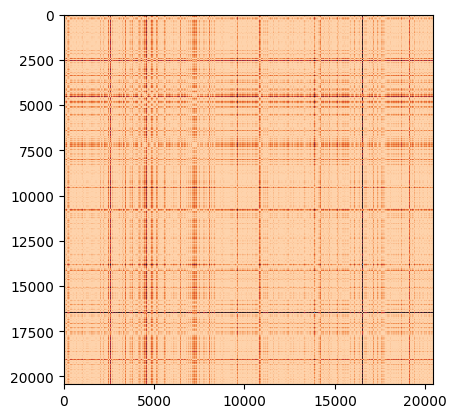

In [7]:
plt.imshow(similarity_matrix, cmap='icefire', interpolation='none')
plt.show()